In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Import CSV

In [2]:
df = pd.read_csv("/Users/humzakhan/Metis/Metis_Projects/Metis_Project_3/Data/churn 3.csv")
df.shape

(10000, 14)

In [3]:
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


# EDA

In [4]:
#Check for null values
df.isnull().values.any()

False

In [5]:
#May split these into columns
df['Geography'].unique()

array(['France', 'Spain', 'Germany'], dtype=object)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [7]:
df.describe()

,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10000.00000,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,5000.50000,1.569094e+07,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,2886.89568,7.193619e+04,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,1.00000,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,2500.75000,1.562853e+07,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,5000.50000,1.569074e+07,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,7500.25000,1.575323e+07,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,10000.00000,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


In [8]:
df['Exited'].value_counts()

0    7963
1    2037
Name: Exited, dtype: int64

**2037 customers have left the bank and 7963 customers have not left the bank**

In [9]:
#customers who left the bank
exit = df.loc[df['Exited'] == 1]

In [10]:
not_exit = df.loc[df['Exited'] == 0]

# Analysis of Categorical Variables

In [11]:
cat_variables = ["Geography","Gender","Tenure","NumOfProducts","HasCrCard","IsActiveMember","Exited"]

In [12]:
def category(variable):
    print(df[variable].value_counts())
    
    sns.countplot(df[variable])
    plt.title(str(variable) + " Histogram")
    plt.savefig(str(variable) + ".png")
    plt.show()

France     5014
Germany    2509
Spain      2477
Name: Geography, dtype: int64


/Users/humzakhan/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


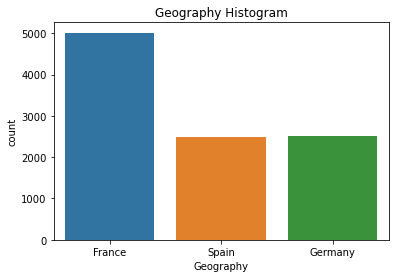

Male      5457
Female    4543
Name: Gender, dtype: int64


/Users/humzakhan/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


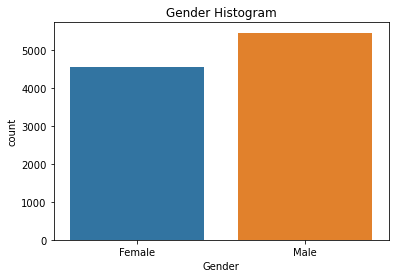

2     1048
1     1035
7     1028
8     1025
5     1012
3     1009
4      989
9      984
6      967
10     490
0      413
Name: Tenure, dtype: int64


/Users/humzakhan/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


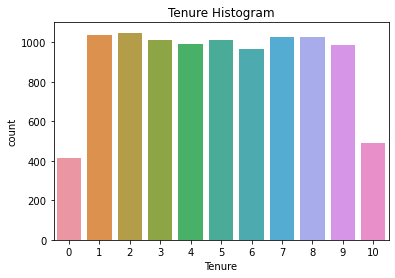

1    5084
2    4590
3     266
4      60
Name: NumOfProducts, dtype: int64


/Users/humzakhan/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


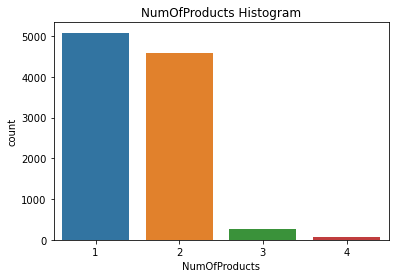

1    7055
0    2945
Name: HasCrCard, dtype: int64


/Users/humzakhan/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


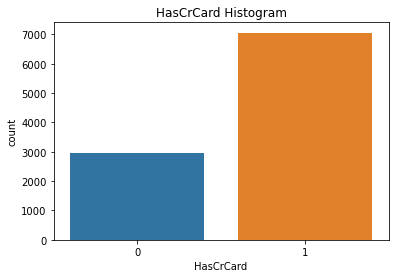

1    5151
0    4849
Name: IsActiveMember, dtype: int64


/Users/humzakhan/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


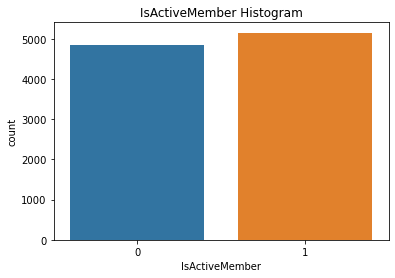

0    7963
1    2037
Name: Exited, dtype: int64


/Users/humzakhan/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


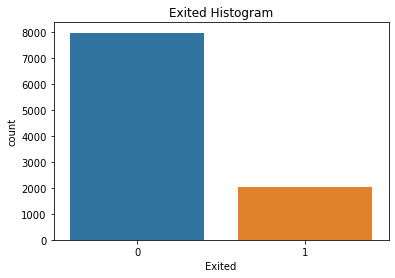

In [13]:
for i in cat_variables:
    category(i)

# Analysis of Numerical Variables

In [14]:
num_variables = ["CreditScore", "Age", "Balance", "EstimatedSalary"]

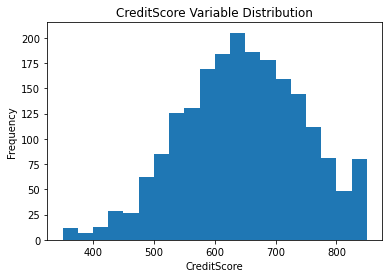

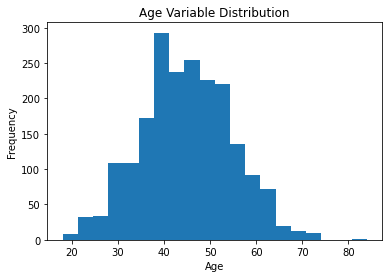

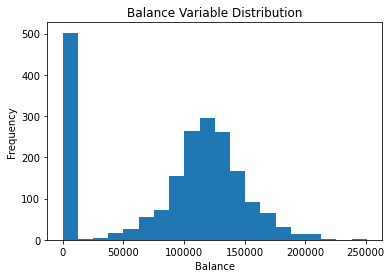

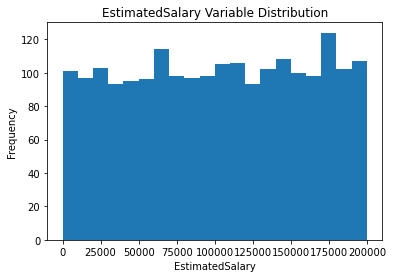

In [15]:
def numeric(variable):
    plt.hist(exit[variable], bins = 20)
    plt.xlabel(variable)
    plt.ylabel("Frequency")
    plt.title("{} Variable Distribution".format(variable))
    plt.savefig(str(variable) + ".png")
    plt.show()
    
for i in num_variables:
    numeric(i)

# Heatmap

<AxesSubplot:title={'center':'Heatmap'}>

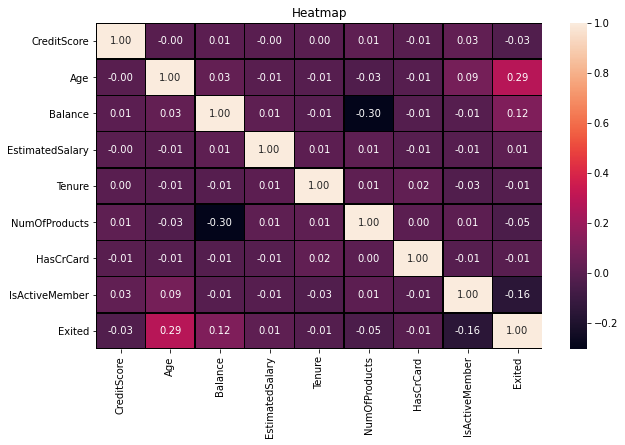

In [16]:
list_corr = ["CreditScore", "Age", "Balance", "EstimatedSalary", "Geography","Gender","Tenure",
             "NumOfProducts","HasCrCard","IsActiveMember","Exited"]
plt.figure(figsize=(10,6))
plt.title("Heatmap")
plt.savefig("Heatmap.png")
sns.heatmap(df[list_corr].corr(), annot = True, linecolor = "black", lw = 0.5, fmt= '.2f') 

# Dummy Variables

In [17]:
# Create new dataframe with dummy features
df = pd.get_dummies(df, columns=['Geography', 'Gender'])

# Display first 10 rows
df.head(10)

,RowNumber,CustomerId,Surname,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_France,Geography_Germany,Geography_Spain,Gender_Female,Gender_Male
0,1,15634602,Hargrave,619,42,2,0.00,1,1,1,101348.88,1,1,0,0,1,0
1,2,15647311,Hill,608,41,1,83807.86,1,0,1,112542.58,0,0,0,1,1,0
2,3,15619304,Onio,502,42,8,159660.80,3,1,0,113931.57,1,1,0,0,1,0
3,4,15701354,Boni,699,39,1,0.00,2,0,0,93826.63,0,1,0,0,1,0
4,5,15737888,Mitchell,850,43,2,125510.82,1,1,1,79084.10,0,0,0,1,1,0
5,6,15574012,Chu,645,44,8,113755.78,2,1,0,149756.71,1,0,0,1,0,1
6,7,15592531,Bartlett,822,50,7,0.00,2,1,1,10062.80,0,1,0,0,0,1
7,8,15656148,Obinna,376,29,4,115046.74,4,1,0,119346.88,1,0,1,0,1,0
8,9,15792365,He,501,44,4,142051.07,2,0,1,74940.50,0,1,0,0,0,1
9,10,15592389,H?,684,27,2,134603.88,1,1,1,71725.73,0,1,0,0,0,1


# Feature Engineering

In [18]:
#Credit Score Grouping

def credit_score_table(row):
    
    credit_score = row.CreditScore
    if credit_score >= 300 and credit_score < 500:
        return "1"
    elif credit_score >= 500 and credit_score < 601:
        return "2"
    elif credit_score >= 601 and credit_score < 661:
        return "3"
    elif credit_score >= 661 and credit_score < 781:
        return "4"
    elif credit_score >= 851:
        return "5"
    elif credit_score >= 781 and credit_score < 851:
        return "6"
    elif credit_score < 300:
        return "0"

In [19]:
#Number of products by tenure

def product_utilization_by_year(row):
    number_of_products = row.NumOfProducts
    tenure = row.Tenure
    
    if number_of_products == 0:
        return 0
    
    if tenure == 0:
        return number_of_products
    
    rate = number_of_products / tenure
    return rate

In [20]:
#Number of products by salary

def estimated_salary_by_product(row):
    number_of_products = row.NumOfProducts
    estimated_salary = row.EstimatedSalary
    
    if number_of_products == 0:
        return 0
    
    rate = estimated_salary / number_of_products 
    return rate

In [21]:
df['CreditScoreTable'] = df.apply(lambda row: credit_score_table(row), axis=1)
df['ProductsbyYear'] = df.apply(lambda row: product_utilization_by_year(row), axis=1)
df['SalarybyProduct'] = df.apply(lambda row: estimated_salary_by_product(row), axis=1)
df["NewTenure"] = df["Tenure"]/df["Age"]

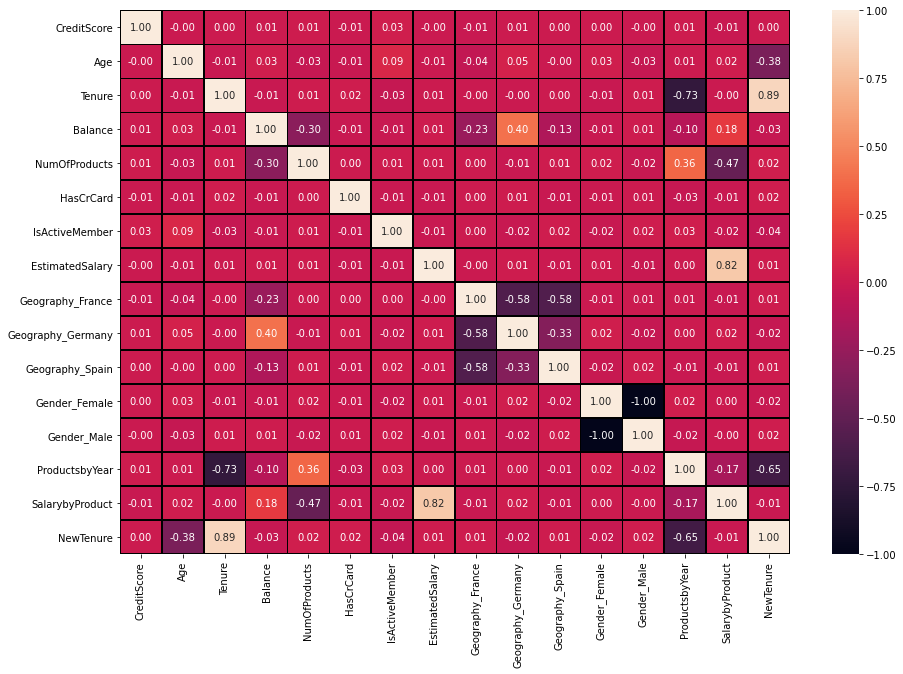

In [22]:
list_corr = ['CreditScore', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard', 'IsActiveMember',
                'EstimatedSalary', 'Geography_France', 'Geography_Germany', 'Geography_Spain', 
                'Gender_Female','Gender_Male', 'CreditScoreTable', 'ProductsbyYear', 'SalarybyProduct', 'NewTenure']
plt.figure(figsize=(15,10))
sns.heatmap(df[list_corr].corr(), annot = True, linecolor = "black", lw = 0.5, fmt= '.2f')
plt.savefig("Heatmap_FE.png")

# PIPELINE

In [23]:
# print_function for compatibility with Python 3
from __future__ import print_function 

# Pickle for reading model files
import pickle

# Scikit-Learn for Modeling
import sklearn

from scipy.fftpack import dct, idct

In [24]:
# Function for splitting training and test set
from sklearn.model_selection import train_test_split # Scikit-Learn 0.18+

# Function for creating model pipelines
from sklearn.pipeline import make_pipeline

# For standardization
from sklearn.preprocessing import StandardScaler

# Helper for cross-validation
from sklearn.model_selection import GridSearchCV

# Area under ROC curve
from sklearn.metrics import roc_auc_score

In [25]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
from sklearn.svm import LinearSVC
from sklearn.svm import SVC
from sklearn.metrics import roc_curve, auc, confusion_matrix
from sklearn.pipeline import make_pipeline
import warnings
warnings.filterwarnings('ignore')

from sklearn.metrics import precision_score, recall_score, precision_recall_curve,f1_score, fbeta_score, log_loss

In [26]:
def get_train_test_split(df, test_size=0.2, random_state=42): 
    # Create separate object for target variable
    y = df['Exited'].copy() 

    # Create separate object for input features
    #X = df.drop(['Exited'], axis=1 )
    
    #CHANGE FEATURES HERE
    
    features = ['CreditScore', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard', 'IsActiveMember',
                'EstimatedSalary', 'Geography_France', 'Geography_Germany', 'Geography_Spain', 
                'Gender_Female','Gender_Male',]

    X = df[features].copy()

    # Split X and y into train and test sets
    X_train, X_test, y_train, y_test =  train_test_split(X, y, 
                                                        test_size=test_size, 
                                                        random_state=random_state,
                                                        stratify=y)
    return X, y, X_train, X_test, y_train, y_test

In [27]:
X, y, X_train, X_test, y_train, y_test = get_train_test_split(df)

In [28]:
def make_confusion_matrix(model, threshold):
    # Predict class 1 if probability of being in class 1 is greater than threshold
    # (model.predict(X_test) does this automatically with a threshold of 0.5)
    y_predict = (model.predict_proba(X)[:, 1] >= threshold)
    fraud_confusion = confusion_matrix(y, y_predict)
    plt.figure(dpi=80)
    sns.heatmap(fraud_confusion, cmap=plt.cm.BuPu, annot=True, square=True, fmt='d',
           xticklabels=['Churn', 'Stay'],
           yticklabels=['Churn', 'Stay']);
    plt.xlabel('Prediction')
    plt.ylabel('Actual')
    
    plt.savefig('Confusion_matrix.png', bbox_inches='tight')

In [29]:
def get_models(random_state=42, nestimators=[100, 200], gblearning_rate=[0.05, 0.1, 0.2],
               gbmax_depth=[1, 3, 5]): #csv file has the sequence numbers after DCT
    
    # Pipeline dictionary
    pipelines = {
        'rf' : make_pipeline(StandardScaler(), RandomForestClassifier(random_state=random_state)),
        'gb' : make_pipeline(StandardScaler(), GradientBoostingClassifier(random_state=random_state)),
        'knn': make_pipeline(StandardScaler(), KNeighborsClassifier()),
        'dt' : make_pipeline(StandardScaler(), DecisionTreeClassifier(random_state=random_state)),
        'log': make_pipeline(StandardScaler(), LogisticRegression(random_state=random_state)),
    }
    
    # Random Forest hyperparameters
    rf_hyperparameters = {
        'randomforestclassifier__n_estimators': nestimators,
        'randomforestclassifier__max_features': ['auto', 'sqrt', 0.33]
    }
    
    # Boosted Tree hyperparameters
    gb_hyperparameters = {
        'gradientboostingclassifier__n_estimators': nestimators,
        'gradientboostingclassifier__learning_rate': gblearning_rate,
        'gradientboostingclassifier__max_depth': gbmax_depth
    }

    # K-Nearest Neighbors hyperparameters
    knn_hyperparameters = {
       'kneighborsclassifier__n_neighbors': [3, 5, 10]
    }
                             
    # Decision Tree hyperparameters
    dt_hyperparameters = {
        'decisiontreeclassifier__criterion': ['entropy' , 'gini'], 
        'decisiontreeclassifier__max_depth': [10, 50, 100]
    }

    # Logistic Regression hyperparameters
    log_hyperparameters = {
        'logisticregression__penalty': ['l1', 'l2', 'elasticnet'],
        'logisticregression__max_iter': [100, 300]
    }

    # Create hyperparameters dictionary
    hyperparameters = {
        'rf' : rf_hyperparameters,
        'gb' : gb_hyperparameters,
        'knn': knn_hyperparameters,
        'dt' : dt_hyperparameters,
        'log': log_hyperparameters,
    }
    
    #create names dictionary
    names = {
        'rf' : "Random Forest",
        'dt': "Decision Tree",
        'gb': "Gradient Boosting",
        'knn': "K Nearest Neighbors",
        'log': "Logistic Regression"
    }
    
    # Create empty dictionary called fitted_models
    fitted_models = {}
    fig = plt.figure(figsize=(9,9))
    # Loop through model pipelines, tuning each one and saving it to fitted_models
    for name, pipeline in pipelines.items():
        # Create cross-validation object from pipeline and hyperparameters
        model = GridSearchCV(pipeline, hyperparameters[name], cv=10)

        # Fit model on X_train, y_train
        model.fit(X_train, y_train)    

        # Store model in fitted_models[name] 
        fitted_models[name] = model    

        # Print '{name} has been fitted'
        print(name, 'has been fitted.')
                             
        # Predict X_test
        pred = model.predict_proba(X_test)

        # Get just the prediction for the postive class (1)
        pred = [p[1] for p in pred]
        print( 'AUROC:', roc_auc_score(y_test, pred) )
                             
        y_predict = model.predict(X_test)
        print("Default threshold:")
        print("Precision: {:6.4f},   Recall: {:6.4f}".format(precision_score(y_test, y_predict), 
                                                         recall_score(y_test, y_predict)))                             
        
        # Calculate ROC curve from y_test and pred
        fpr, tpr, thresholds = roc_curve(y_test, pred)

        # Initialize figure
        plt.title('ROC Curve')

        # Plot ROC curve
        plt.plot(fpr, tpr, label=names[name], linewidth=5)
        #plt.legend(loc='lower right')

        # Diagonal 45 degree line
        plt.plot([0,1],[0,1], 'k--')

        # Axes labels
        plt.ylabel('True Positive Rate')
        plt.xlabel('False Positive Rate')
        plt.rcParams.update({'font.size': 22})
        plt.grid(True)
        plt.legend(loc='lower right')
        #plt.show()
        plt.savefig('ROC_AllModels.png', bbox_inches='tight')
        # Print AUROC
        print( 'AUROC:', roc_auc_score(y_test, pred) )
        #make confusion matrix 
        make_confusion_matrix(model, threshold=0.5)
    return

rf has been fitted.
AUROC: 0.8524533778771067
Default threshold:
Precision: 0.7652,   Recall: 0.4644
AUROC: 0.8524533778771067
gb has been fitted.
AUROC: 0.8698660139338105
Default threshold:
Precision: 0.8147,   Recall: 0.4644
AUROC: 0.8698660139338105
knn has been fitted.
AUROC: 0.7523039217954473
Default threshold:
Precision: 0.6222,   Recall: 0.3440
AUROC: 0.7523039217954473
dt has been fitted.
AUROC: 0.771038372733288
Default threshold:
Precision: 0.6473,   Recall: 0.4644
AUROC: 0.771038372733288
log has been fitted.
AUROC: 0.7747562662816899
Default threshold:
Precision: 0.5891,   Recall: 0.1867
AUROC: 0.7747562662816899


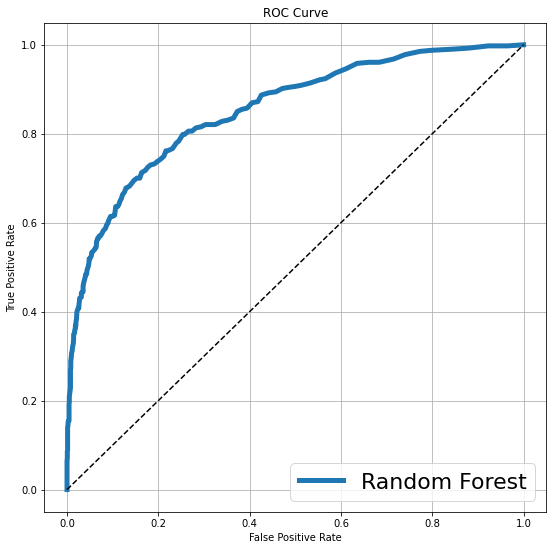

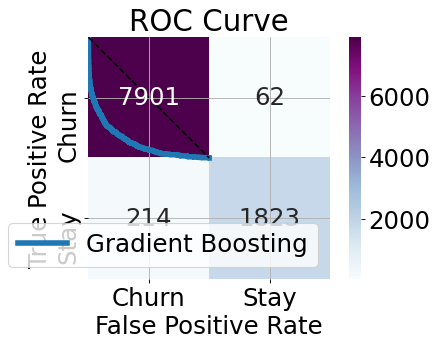

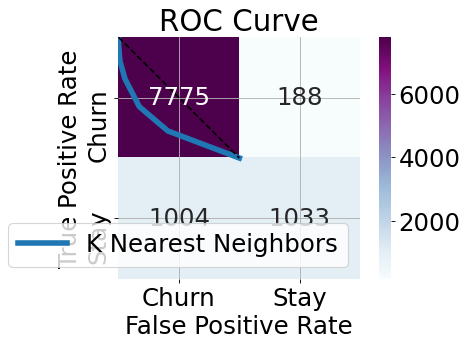

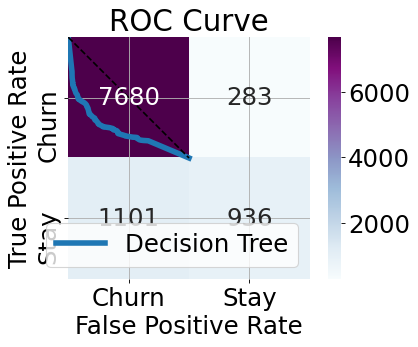

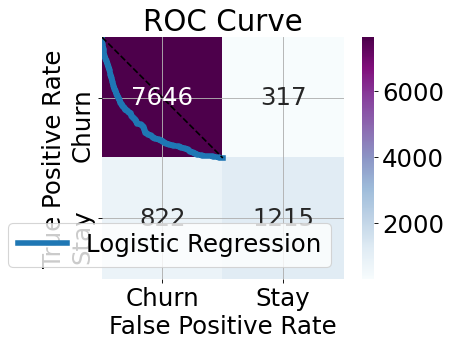

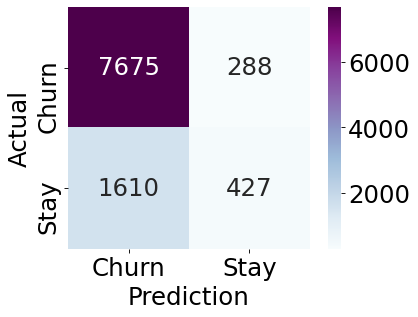

In [30]:
best_model = get_models() #Pick the model with the highest AUC score 